In [0]:
#!git clone "https://github.com/TannyS26/English-Character-Recognition.git"

In [0]:
#!ls English-Character-Recognition/Data

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [8]:
%tensorflow_version 2.x
#!pip show tensorflow

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import cv2
import os
import glob
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
path = './gdrive/My Drive/Colab Notebooks/English-Character-Recognition'
data = pd.read_csv(os.path.join(path, 'data.csv'))

In [11]:
print(len(data))

372450


In [12]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 2.2 GB


In [14]:
# The '0'th column is the labels for the characters which is aur target value
data.groupby('0').count()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,...,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869,13869
1,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,...,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668,8668
2,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,...,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409,23409
3,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,...,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134,10134
4,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,...,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440,11440
5,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,...,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163,1163
6,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,...,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762,5762
7,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,...,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,7218,721

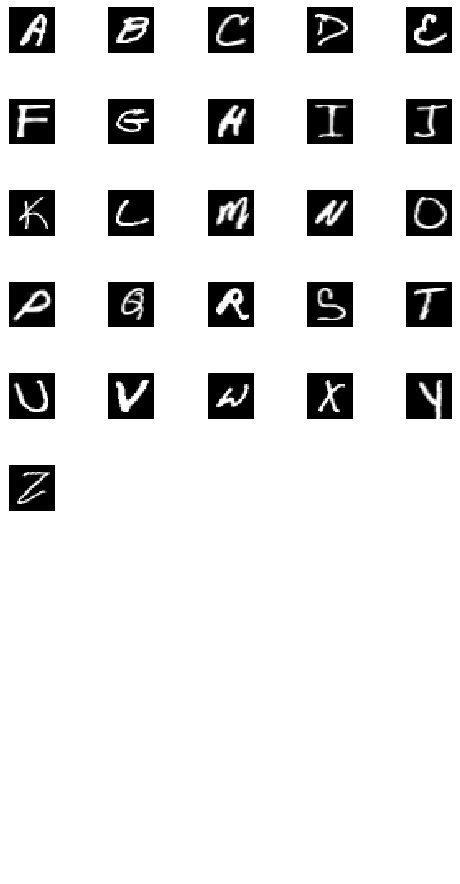

In [25]:
char_label = data['0'].unique()  
rows =10;
columns = 5;
fig, ax = plt.subplots(rows, columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_label):
            x = data[data['0']==char_label[columns*row+col]].iloc[0,:-1].values.reshape(28, 28)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap='gray')
            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()

In [0]:
X = data.values[:,1:]/255.0
Y = data["0"].values

In [0]:
n_classes = 26

In [0]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
x_train = np.asarray(x_train, np.float)
x_test = np.asarray(x_test, np.float)
y_train = np.asarray(y_train, np.float)
y_test = np.asarray(y_test, np.float)

In [40]:
print(x_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [0]:
# Making a Definition for creating a CNN Model
def cnn_model():
    
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation = 'relu'))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = "same"))
    
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides = (2, 2), padding = "same"))
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation = 'relu'))
    model.add(layers.Dense(64, activation = 'relu'))
    
    model.add(layers.Dense(n_classes, activation = 'softmax'))
    
    model.compile(optimizer = tf.keras.optimizers.Adam(), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])
    
    return model

In [45]:
model = cnn_model()

# Showing the details of different layers in the CNN
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [46]:
training_history = model.fit(x = x_train, y = y_train,
                             batch_size = 32,
                             epochs = 10,
                             validation_data = (x_test, y_test),
                             shuffle = True,
                             verbose = 1
                             )

Train on 297960 samples, validate on 74490 samples
Epoch 1/10
297960/297960 [==============================] - 50s 169us/sample - loss: 0.1580 - acc: 0.9549 - val_loss: 0.0543 - val_acc: 0.9854
Epoch 2/10
297960/297960 [==============================] - 47s 157us/sample - loss: 0.0699 - acc: 0.9801 - val_loss: 0.0507 - val_acc: 0.9867
Epoch 3/10
297960/297960 [==============================] - 47s 156us/sample - loss: 0.0580 - acc: 0.9836 - val_loss: 0.0363 - val_acc: 0.9900
Epoch 4/10
297960/297960 [==============================] - 47s 156us/sample - loss: 0.0515 - acc: 0.9853 - val_loss: 0.0400 - val_acc: 0.9891
Epoch 5/10
297960/297960 [==============================] - 47s 158us/sample - loss: 0.0478 - acc: 0.9864 - val_loss: 0.0359 - val_acc: 0.9901
Epoch 6/10
297960/297960 [==============================] - 47s 157us/sample - loss: 0.0449 - acc: 0.9872 - val_loss: 0.0343 - val_acc: 0.9907
Epoch 7/10
297960/297960 [==============================] - 47s 156us/sample - loss: 0.0433

In [0]:
model.save('cnn_model-10-epochs.h5')

In [0]:
# convert the training_history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(training_history.history) 

# saving as a csv file: 
hist_csv_file = 'history-{}-epochs.csv'.format(10)

with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

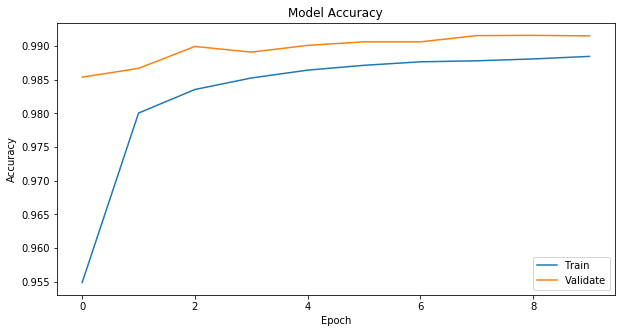

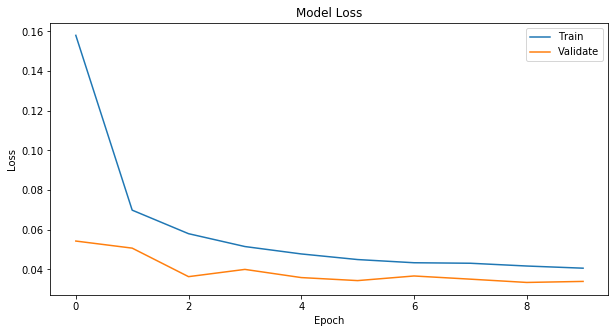

In [51]:
plt.figure(figsize=(10, 5))
# summarize history for accuracy
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='lower right')
plt.show()

plt.figure(figsize=(10, 5))
# summarize history for loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper right')
plt.show()